# Proton Spin Up

In [2]:
import ipywidgets as widgets
from ipywidgets import interact, IntSlider
import numpy as np
import matplotlib.pyplot as plt
import json
import pandas as pd
from scipy import optimize

## Polarization vs Time

,num,freq_list,phase,diode,channel,settings,diode_vout,phase_vout,sweeps,cc,...,shimA,shimB,shimC,shimD,beam_current_sum,beam_time_sum,beam_current_update_time,elapsed,fitcurve,rescurve
stop_time,,,,,,,,,,,,,,,,,,,,,
2022-11-06 01:33:44.073311+00:00,4000,"[212.482, 212.48357470703127, 212.485137207031...","[-5.43341908761492, -5.433342074286808, -5.433...","[6.148653848889769, 6.148532993497874, 6.14837...","{'name': 'Proton5T', 'species': 'proton', 'cen...","{'default_channel': 'Proton5T', 'daq_type': 'F...",0.068,0.353,4000,-1.755435,...,0,0,0,0,0.254262,662.973042,2022-11-06 01:32:24.804413+00:00,79,"[0.002260761629752, 0.002260438852992, 0.00226...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2022-11-06 01:35:03.293235+00:00,4000,"[212.482, 212.48357470703127, 212.485137207031...","[-5.433591013400431, -5.433509155299782, -5.43...","[6.148985656259006, 6.148841411056628, 6.14868...","{'name': 'Proton5T', 'species': 'proton', 'cen...","{'default_channel': 'Proton5T', 'daq_type': 'F...",0.068,0.353,4000,-1.755435,...,0,0,0,0,0.496325,597.511958,2022-11-06 01:33:44.073799+00:00,79,"[0.002100320738888, 0.002101168363259, 0.00210...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2022-11-06 01:36:22.513498+00:00,4000,"[212.482, 212.48357470703127, 212.485137207031...","[-5.433831118362313, -5.433752327509078, -5.43...","[6.149635757956453, 6.149499489402847, 6.14934...","{'name': 'Proton5T', 'species': 'proton', 'cen...","{'default_channel': 'Proton5T', 'daq_type': 'F...",0.068,0.353,4000,-1.755435,...,0,0,0,0,-0.152440,614.611080,2022-11-06 01:35:03.293461+00:00,79,"[0.001848667594596, 0.0018504428153450002, 0.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2022-11-06 01:37:41.729688+00:00,4000,"[212.482, 212.48357470703127, 212.485137207031...","[-5.433940866745208, -5.433903032737382, -5.43...","[6.150198348004211, 6.150111646558263, 6.14987...","{'name': 'Proton5T', 'species': 'proton', 'cen...","{'default_channel': 'Proton5T', 'daq_type': 'F...",0.068,0.353,4000,-1.755435,...,0,0,0,0,0.664452,631.116050,2022-11-06 01:36:22.513779+00:00,79,"[0.0017356716971010002, 0.001738109176418, 0.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2022-11-06 01:39:00.949576+00:00,4000,"[212.482, 212.48357470703127, 212.485137207031...","[-5.433332703582187, -5.433284674993872, -5.43...","[6.148575239835983, 6.148501906751818, 6.14827...","{'name': 'Proton5T', 'species': 'proton', 'cen...","{'default_channel': 'Proton5T', 'daq_type': 'F...",0.068,0.353,4000,-1.755435,...,0,0,0,0,0.076307,646.253956,2022-11-06 01:37:41.734037+00:00,79,"[0.002332856143737, 0.002335921473304, 0.00233...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


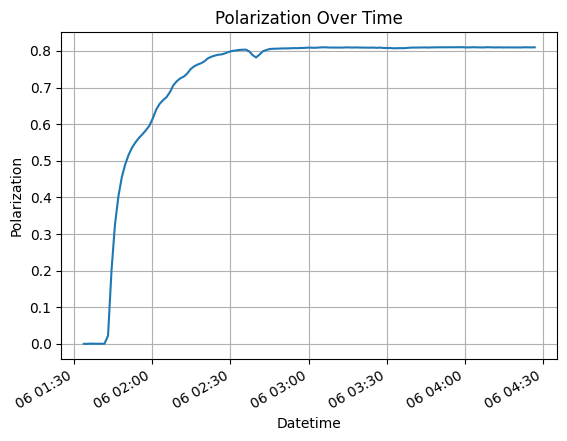

In [3]:

with open("2022-11-05_23-29-51__2022-11-06_11-20-39.txt","r") as eventfile:
    df = pd.read_json(eventfile, lines=True)
df['stop_time'] = pd.to_datetime(df['stop_time'])
df.set_index('stop_time', inplace=True)

df['pol'].plot(title='Polarization Over Time',
                      xlabel='Datetime',
                      ylabel='Polarization',
               grid = True)

df.head()

## Interactive Plot, Drag Slider to Select Result Curve

In [4]:
def plot_pol_array(index):
    plt.figure(figsize=(10, 6))
    signal_array = df.iloc[index]['rescurve']  # Get array from selected row
    plt.plot(signal_array, linewidth=2)
    plt.title(f'Result Signal {index} (Polarization: {df.iloc[index]['pol']:.2f})')
    plt.grid(True, alpha=0.3)
    plt.show()

# Create interactive widget
interact(plot_pol_array,
         index=IntSlider(min=0, max=len(df)-1, step=1, value=9,
                        description='Row Index:'))

interactive(children=(IntSlider(value=9, description='Row Index:', max=131), Output()), _dom_classes=('widget-…

<function __main__.plot_pol_array(index)>